# Projectile Motion Assignment: Due Wednesday 9/7

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

Type Markdown and LaTeX:  $𝛼^2$



Code the equations into a function 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math
%matplotlib notebook

#initial conditions
𝛾 = 0.25 #𝑁⋅𝑠2/𝑚4 
𝜆 = 10000 #m
m = 13.78 #kg
g = 9.8 #m/s2
D = 0.15 #m
Vi = 300 #m/s
θ = 0.87266463 #50 * math.pi/180 #Radians

xy = np.array([0.0, Vi * math.cos(θ), 0.0, Vi * np.math.sin(θ)]) #[m, m/s, m, m/s]
t0 = 0
tf = 47
t1 = np.linspace(t0,tf,100)

#define projectile motion function in vaccum
def proj_vac(t, xy):
    '''t is a numpy array
       x is a numpt array'''    
    dx_dt = xy[1]
    dvx_dt = 0
    dy_dt = xy[3]
    dvy_dt = -g
    #print(dx_dt, dvx_dt, dy_dt, dvy_dt)
    return np.array([dx_dt, dvx_dt, dy_dt, dvy_dt])



Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [2]:
sol_RK45 = integrate.solve_ivp(proj_vac, (t0,tf), xy, method='RK45', t_eval=t1);#code
sol_RK45.y[0]

array([   0.        ,   91.54853791,  183.09707583,  274.64561374,
        366.19415165,  457.74268956,  549.29122748,  640.83976539,
        732.3883033 ,  823.93684121,  915.48537913, 1007.03391704,
       1098.58245495, 1190.13099286, 1281.67953078, 1373.22806869,
       1464.7766066 , 1556.32514451, 1647.87368243, 1739.42222034,
       1830.97075825, 1922.51929616, 2014.06783408, 2105.61637199,
       2197.1649099 , 2288.71344781, 2380.26198573, 2471.81052364,
       2563.35906155, 2654.90759946, 2746.45613738, 2838.00467529,
       2929.5532132 , 3021.10175111, 3112.65028903, 3204.19882694,
       3295.74736485, 3387.29590277, 3478.84444068, 3570.39297859,
       3661.9415165 , 3753.49005442, 3845.03859233, 3936.58713024,
       4028.13566815, 4119.68420607, 4211.23274398, 4302.78128189,
       4394.3298198 , 4485.87835772, 4577.42689563, 4668.97543354,
       4760.52397145, 4852.07250937, 4943.62104728, 5035.16958519,
       5126.7181231 , 5218.26666102, 5309.81519893, 5401.36373

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


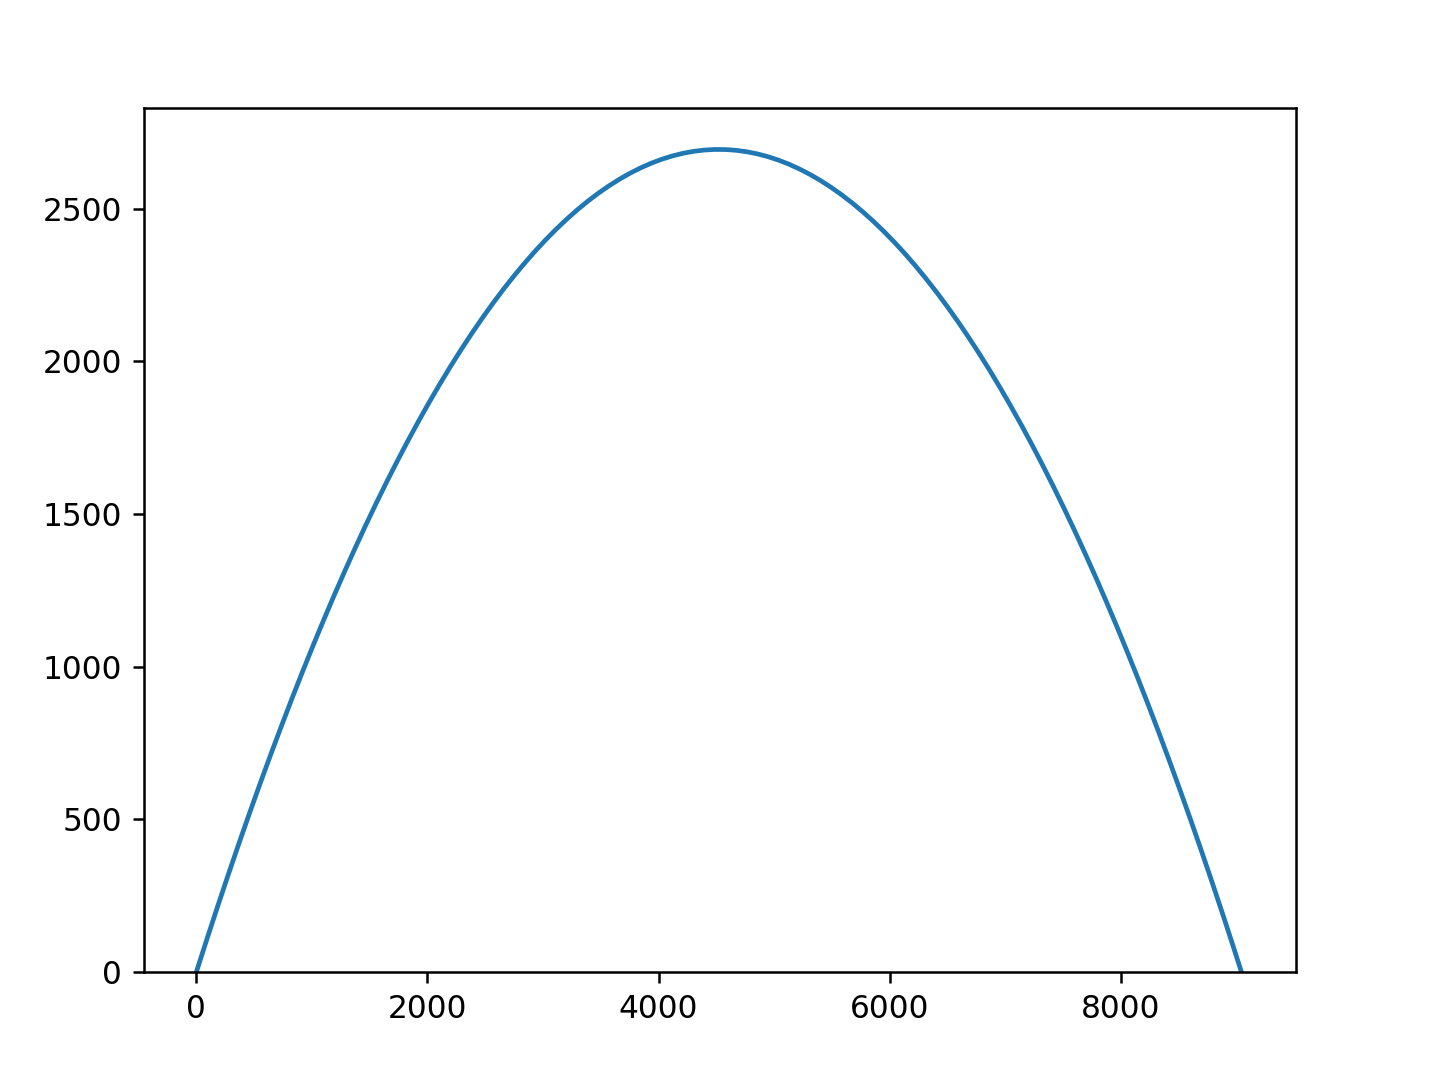

In [13]:
fig = plt.figure('Position')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45.y[0],sol_RK45.y[2]);#codes
plt.ylim(0);

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [4]:
def rungekutta_4( f, t, xy, args=()):#codes
    n = len(t)
    x = np.zeros( ( n, len(xy) ) )
    x[0] = xy 
    for i in range (0,n-1): 
        dt = t[i+1]-t[i]  #same as RK1 
        k1 = f(t[i],x[i],*args); #same as RK1
        k2 = f(t[i] + dt/2.0, x[i] + dt/2.0 * k1, *args)
        k3 = f(t[i] + dt/2.0, x[i] + dt/2.0 * k2, *args)
        k4 = f(t[i] + dt, x[i] + dt *k3, *args)
        x[i+1] = x[i] + (dt/6)*(k1 + k2 + k3 + k4)
    
    return x

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

<IPython.core.display.Javascript object>


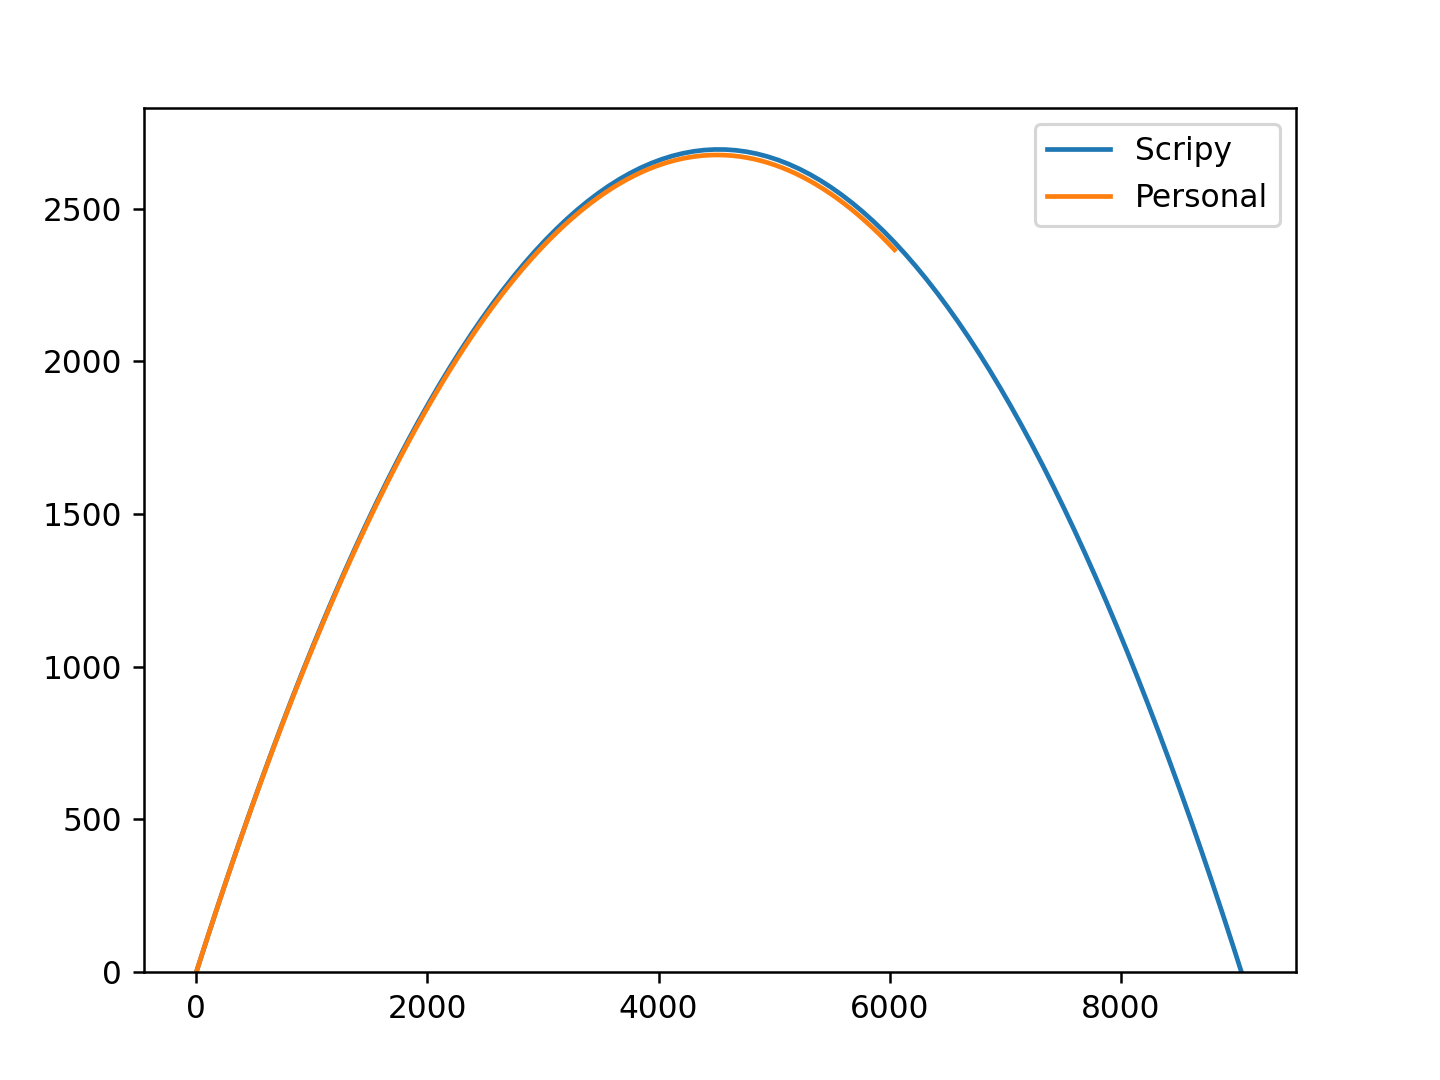

In [5]:
run4 = rungekutta_4(proj_vac, t1, xy)
fig = plt.figure('Scripy vs Personal')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45.y[0],sol_RK45.y[2], label='Scripy');#codes
ax.plot(run4[:,0], run4[:,2], label='Personal')
ax.legend(loc='best')
plt.ylim(0);
#I tried my best with plotting my personal rungekutta method of order 4 and I can't seem to get it to reach the entire x value.

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [6]:
def proj_with_air(t, xy, D):#code
    '''t is a numpy array
       x is a numpt array
       D is the Diameter of the Object'''
    c = 𝛾 * (D**2)
    dx_dt = xy[1]
    dvx_dt = (-(dx_dt)*(math.sqrt((xy[1]**2)+(xy[3]**2)))*c)/m
    dy_dt = xy[3]
    dvy_dt = -g -((dy_dt)*(math.sqrt((xy[1]**2)+(xy[3]**2)))*c)/m
    #print(dx_dt, dvx_dt, dy_dt, dvy_dt)
    return np.array([dx_dt, dvx_dt, dy_dt, dvy_dt])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [7]:
sol_RK45A = integrate.solve_ivp(proj_with_air, (t0,tf), xy, method='RK45', t_eval=t1, args=[D]);#code
sol_RK45A.y[0]

array([   0.        ,   88.99597679,  173.29216715,  253.40616074,
        329.77151576,  402.77328607,  472.74820808,  539.98470073,
        604.7302084 ,  667.19862146,  727.57032269,  786.01174889,
        842.67581614,  897.70191975,  951.21593429, 1003.33021361,
       1054.14359076, 1103.74151957, 1152.20342931, 1199.5981423 ,
       1245.98653212, 1291.42546316, 1335.96779064, 1379.66236061,
       1422.55400994, 1464.6835663 , 1506.08784821, 1546.799665  ,
       1586.84781681, 1626.25709462, 1665.04828023, 1703.23814624,
       1740.8394561 , 1777.86350917, 1814.32799405, 1850.23709481,
       1885.59293951, 1920.39756519, 1954.65291785, 1988.36085247,
       2021.52313301, 2054.14143239, 2086.21733248, 2117.75232417,
       2148.74780727, 2179.2050906 , 2209.12539192, 2238.50983799,
       2267.35946452, 2295.6752162 , 2323.45794668, 2350.7084186 ,
       2377.42730355, 2403.6151821 , 2429.27254381, 2454.39978717,
       2478.99721968, 2503.06505778, 2526.60342691, 2549.61307

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


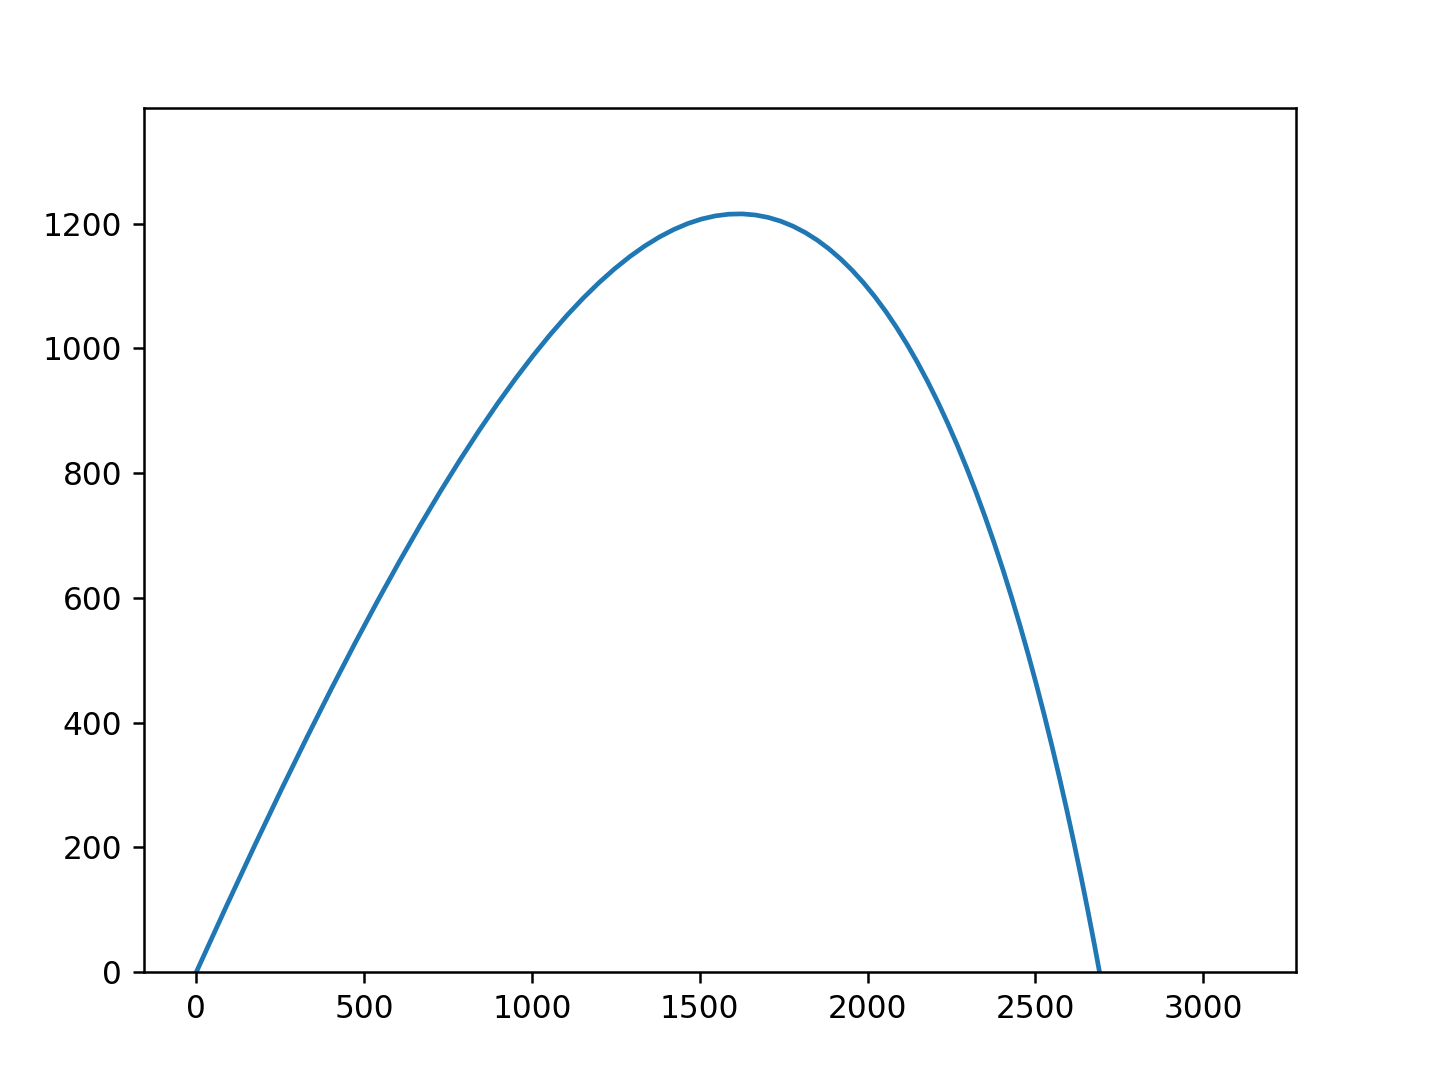

In [8]:
fig = plt.figure('Position with Air Resistance')#codes
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45A.y[0],sol_RK45A.y[2]);
plt.ylim(0);

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [9]:
def proj_with_air_and_atm(t, xy, D):#code
    '''t is a numpy array
       x is a numpt array
       D is the Diameter of the Object'''
    dx_dt = xy[1]
    dvx_dt = (-(dx_dt)*(math.sqrt((xy[1]**2)+(xy[3]**2)))*c_func(xy[2], D))/m
    dy_dt = xy[3]
    dvy_dt = -g -((dy_dt)*(math.sqrt((xy[1]**2)+(xy[3]**2)))*c_func(xy[2], D))/m
    #print(dx_dt, dvx_dt, dy_dt, dvy_dt)
    return np.array([dx_dt, dvx_dt, dy_dt, dvy_dt])
def c_func(y, D):
    return 𝛾 * (D**2) * math.exp(-y/𝜆)

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [10]:
sol_RK45B = integrate.solve_ivp(proj_with_air_and_atm, (t0,tf), xy, method='RK45', t_eval=t1, args = [D]);#code
sol_RK45B.y[0]

array([   0.        ,   89.00462651,  173.35412765,  253.59397569,
        330.17607625,  403.49681719,  473.89726055,  541.66316654,
        607.04013576,  670.23462868,  731.42460893,  790.77363453,
        848.43085786,  904.53102571,  959.19447923, 1012.52715397,
       1064.62057985, 1115.55470977, 1165.40583388, 1214.23669095,
       1262.1052571 , 1309.06561039, 1355.16793082, 1400.45850031,
       1444.97970276, 1488.77002399, 1531.86405177, 1574.29247579,
       1616.08208771, 1657.25578112, 1697.83255156, 1737.82749648,
       1777.25204038, 1816.12624222, 1854.46043285, 1892.25639815,
       1929.51572515, 1966.23980208, 2002.42981832, 2038.08676443,
       2073.21143215, 2107.80441438, 2141.8661052 , 2175.39669984,
       2208.39619472, 2240.86438745, 2272.80087676, 2304.20506261,
       2335.07614608, 2365.41312946, 2395.21481618, 2424.47981088,
       2453.20651933, 2481.39314849, 2509.03770651, 2536.13800267,
       2562.69164746, 2588.69605253, 2614.14843841, 2639.04946

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


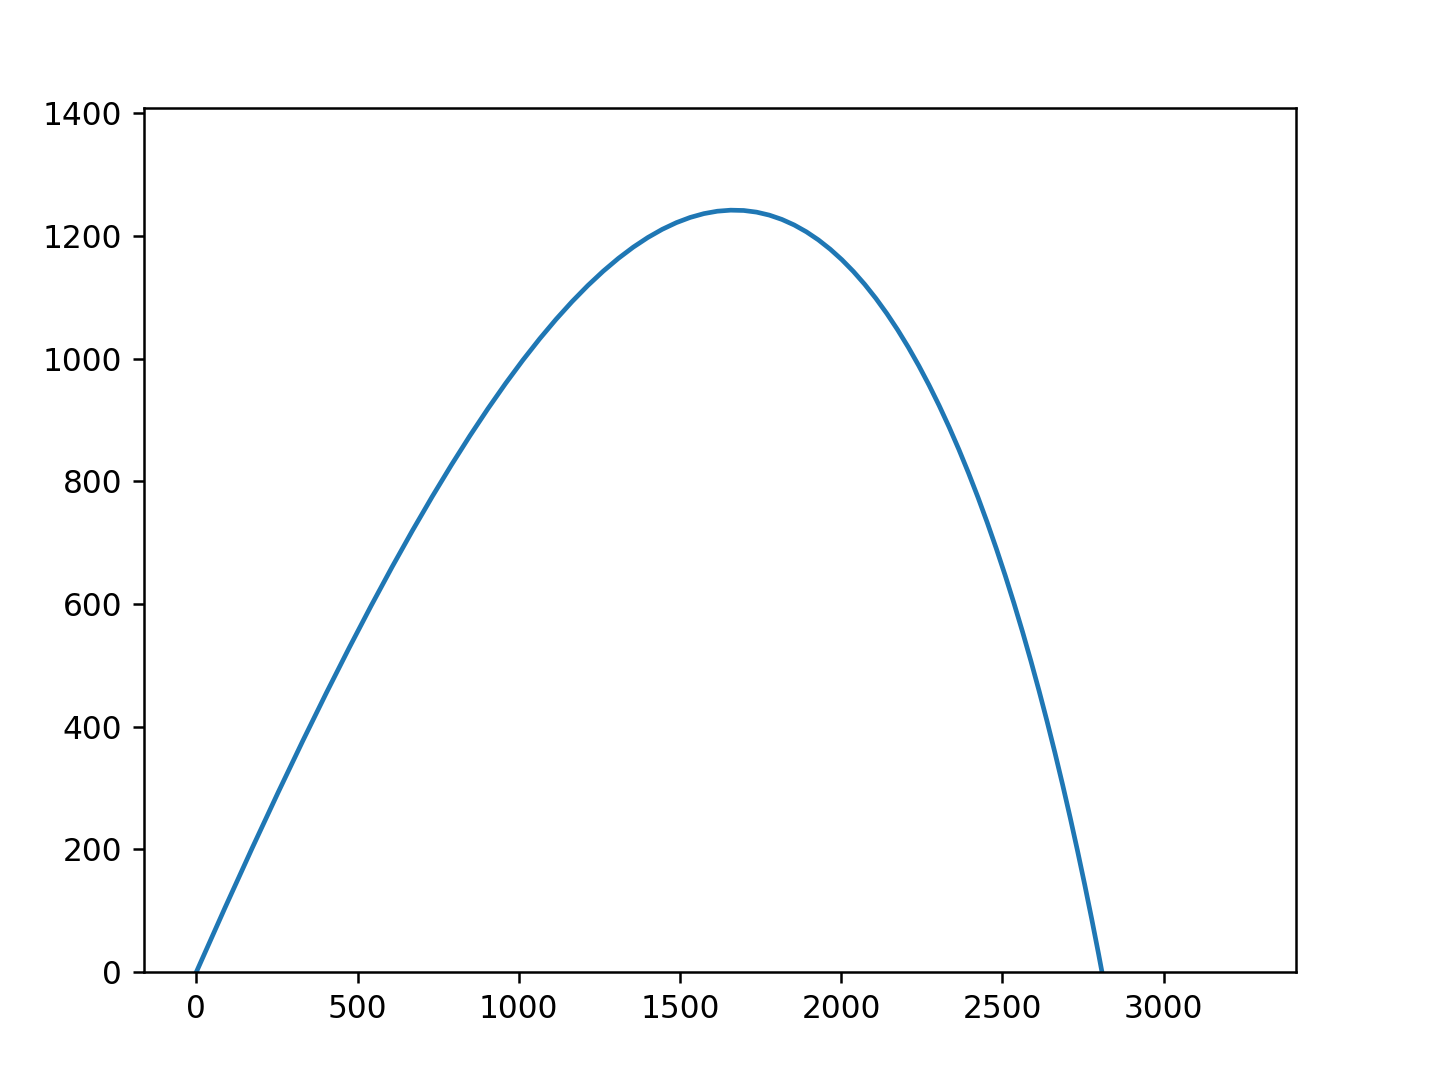

In [11]:
fig = plt.figure('Position with Varying Air Resistance')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45B.y[0],sol_RK45B.y[2]);#codes
plt.ylim(0);

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


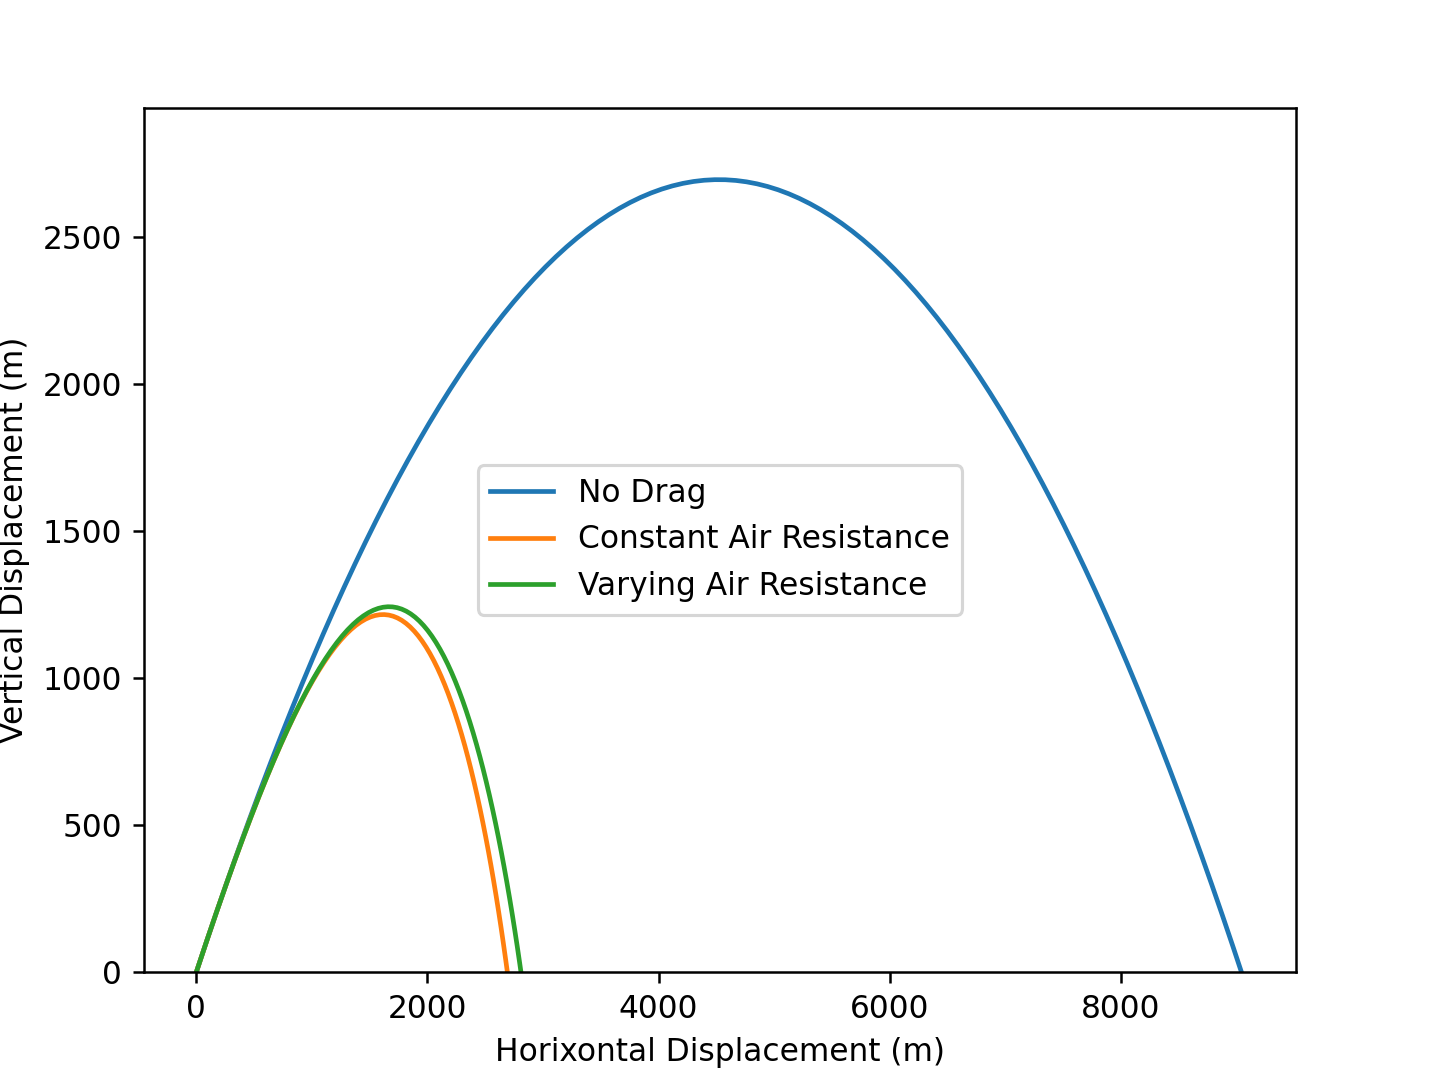

In [12]:
fig = plt.figure('Position1')#codes
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45.y[0],sol_RK45.y[2], label = 'No Drag')
ax.plot(sol_RK45A.y[0],sol_RK45A.y[2], label = 'Constant Air Resistance')
ax.plot(sol_RK45B.y[0],sol_RK45B.y[2], label = 'Varying Air Resistance')
ax.legend(loc='best')
ax.set_xlabel('Horixontal Displacement (m)')
ax.set_ylabel('Vertical Displacement (m)')
plt.ylim(0);


Your results should look like the plot below.

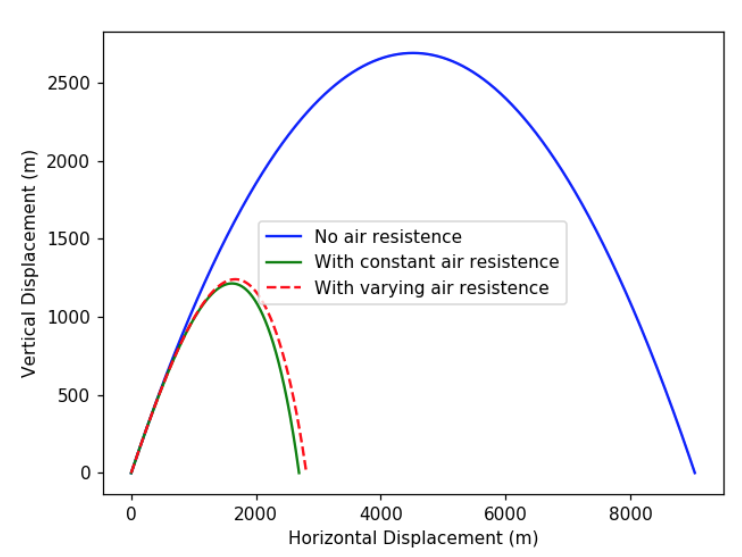

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**